In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages:Annotated[list,add_messages]
    # It can be used to append the each messages i.e ai or Human message in the form of List

In [23]:
import os
from dotenv import load_dotenv
load_dotenv()
from langchain_groq import ChatGroq

llm = ChatGroq(model = "llama-3.1-8b-instant")

### Creating a Node

In [24]:
def superBot(state:State):
    print("Super Bot is Called")
    return {"messages":[llm.invoke(state["messages"])]}

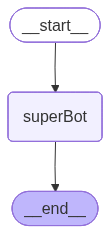

In [21]:
from IPython.display import Image,display

### Create a Graph

graph = StateGraph(State)

## Add a Nodes
graph.add_node("superBot",superBot)

## Add a Edges
graph.add_edge(START,"superBot")
graph.add_edge("superBot",END)

##Compile the graph
graph_builder = graph.compile()

##View the Graph 
display(Image(graph_builder.get_graph().draw_mermaid_png()))

### Exucute the Graph

In [25]:
## In a Two ways Exucution

graph_builder.invoke({"messages":"Hi My Name is Husen and Love Cats"})

Super Bot is Called


{'messages': [HumanMessage(content='Hi My Name is Husen and Love Cats', additional_kwargs={}, response_metadata={}, id='e8f43b3b-12f2-4649-b974-72936a7fe2da'),
  AIMessage(content="Nice to meet you, Husen! Cats are truly amazing creatures, aren't they? Their independence, agility, and playful personalities make them a joy to be around. Do you have a cat, or are you a cat enthusiast?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 44, 'total_tokens': 92, 'completion_time': 0.07230381, 'completion_tokens_details': None, 'prompt_time': 0.002996417, 'prompt_tokens_details': None, 'queue_time': 0.049888503, 'total_time': 0.075300227}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b0c2c-e40e-7071-bd62-a0056882b200-0', usage_metadata={'input_tokens': 44, 'output_tokens': 48, 'total_tokens': 92})]}

## Using Streaming in another way



In [15]:
graph_builder.stream({"messages":"Hello my name is Husen"})

<generator object Pregel.stream at 0x0000017F5DE2E430>

In [17]:
for event in graph_builder.stream({"messages":"Hello my name is Husen"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello my name is Husen', additional_kwargs={}, response_metadata={}, id='d78a3574-9e4c-49aa-987d-6527b62a9136')]}
Super Bot is Called
{'messages': [HumanMessage(content='Hello my name is Husen', additional_kwargs={}, response_metadata={}, id='d78a3574-9e4c-49aa-987d-6527b62a9136'), AIMessage(content="Hello Husen, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 41, 'total_tokens': 68, 'completion_time': 0.026608441, 'completion_tokens_details': None, 'prompt_time': 0.002001382, 'prompt_tokens_details': None, 'queue_time': 0.054697678, 'total_time': 0.028609823}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b0888-9385-77b0-9486-f811daa2f823-0', usage_metadata={'input_to

In [18]:
for event in graph_builder.stream({"messages":"Hello my name is Husen"},stream_mode="updates"):
    print(event)

Super Bot is Called
{'superBot': {'messages': [AIMessage(content="Hello Husen, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 41, 'total_tokens': 68, 'completion_time': 0.029612475, 'completion_tokens_details': None, 'prompt_time': 0.001967985, 'prompt_tokens_details': None, 'queue_time': 0.054352465, 'total_time': 0.03158046}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b0889-752a-7150-b9ca-7ef20c7c1913-0', usage_metadata={'input_tokens': 41, 'output_tokens': 27, 'total_tokens': 68})]}}
